# **Cortical Thickness Prediction**

> Cortical thickness estimation is typically a regression task. The objective is to predict or estimate the thickness of the cerebral cortex at different locations within the brain. This task involves continuous numerical values as the target variable, as cortical thickness is measured in millimeters or micrometers.

## **Estimating a cortical thickness map for T1-weighted brain imaging**

> In this challenge you will develop an algorithm to estimate cortical thickness map from a raw T1-weighted image. Cortical thickness map is the thickness of the gray matter of the brain at every point. It is defined as the distance between the white matter surface and the pial surface (see below, the length of the green arrow is the cortical thickness).

### **Output**:
your python script must output a 3D volume where every pixel NOT in the gray matter is assigned a value of zero, and every pixel in the gray matter is assigned the thickness value of the cortex at that point:

### **Datasets**:
you have been provided with the following images:
- **raw_t1_subject_01.nii.gz**
- **thickness_map_subject_01.nii.gz**
- **raw_t1_subject_02.nii.gz** (TARGET: PRODUCE THICKNESS MAP FOR THIS IMAGE)

> **thickness_map_subject_01.nii.gz** is the cortical thickness map corresponding to the
raw_t1_subject_01.nii.gz. This is to help give you a ground-truth so you know what to work towards. Your objective is to produce a similar image for subject_02.

### **Tips**:
- Use nibabel libraries to load nifti image into python
- You will probably want to segment the white matter first. This will give you the starting point for your thickness estimation algorithm.
- Once you have the white matter segmentation, decide how you will go about estimating
thickness. Something like the following:
1. Find a vector orthogonal to the white matter surface
2. Cast the vector outwards
3. Use some heuristic to decide where the vector meets the pial surface (cortical thickness is then given by vector length).

### **Summary**:
- Load raw_t1_subject_02.nii.gz into python.
- Segment the gray and white matter.
- Use some algorithm to find the cortical thickness at each point in the gray matter. - Label all gray matter voxels with the cortical thickness value at that point.
- Output the labeled image (like in figure 02).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib # we have access to a variety of imaging formats
from skimage import filters, morphology # we next applied a gaussian filter to the subject 1 raw in order to soothe the image and make segmenting white and gray matter easier.
from scipy import spatial # used for scientific and mathematical computations.

In [ ]:
# Load all the data which is needed
t1_s1 = nib.load('aw_t1_subject_01.nii.gz').get_fdata()
t1_s2 = nib.load('raw_t1_subject_02.nii.gz').get_fdata()
thickness_s1 = nib.load('thickness_map_subject_01.nii').get_fdata()

# **Version 1**

In [ ]:
Replicated_data = np.copy(t1_s2)
t1_s2[t1_s2 < 80] = 0 # get white matter using tolerance
whiteMatter = t1_s2
med_wm = filters.median(whiteMatter) # Apply median filter on white matter.
dil = morphology.binary_dilation(med_wm) # Apply binary dilation on white matter.
wm_boundary = dil.astype(float) - med_wm # Subtract white matter from dilated white matter.
wm_boundary = wm_boundary.ravel() # convert it to 1 dimension
wm_boundary[wm_boundary != 1] = 0 # get the WM boundary by replacing the coordinates which are not in wmboundary with zero.
wm_boundary = np.reshape(wm_boundary,(256,256,256)) # Reshape the wm boundary array in 3D

According to above codes, medical MRI files are uploaded. Then, by using tolerance techniques, and the median filter (that used for noise reduction), white matter part separated from others.

In [ ]:
dil_new = np.copy(dil) # create a copy of dilated boundary.
for i in range(5):
    dil_new = morphology.binary_dilation(dil_new) # dilate wm few times to cover the whole area of grey matter.
edge_t2_dil = dil_new.astype(float) - med_wm # delete the original wm from the dilated one.
ravel_d2_edge  = edge_t2_dil.ravel() # convert it to 1 dimension
ravel_d2_edge[ravel_d2_edge != 1] = 0 # get the grey matter.
ravel_d2_edge = np.reshape(ravel_d2_edge,(256,256,256))  # reshape it to 3D.

In [ ]:
d1_greymatter_ravel = ravel_d2_edge.ravel() # convert it to 1 dimension
d1_org_ravel = Replicated_data.ravel() # convert it to 1 dimension
grey_arr_int_3d = np.zeros(d1_org_ravel.size)
index_of_1_greymatter = np.where(d1_greymatter_ravel == 1) # take those points on which we have to process.
# To find out original greymatter with original values.
for i in index_of_1_greymatter[0]:
    np.put(grey_arr_int_3d, i, d1_org_ravel[i])
sum_intensity = np.sum(grey_arr_int_3d)
grey_arr_int_3d = np.reshape(grey_arr_int_3d,(256,256,256))
sum_intensity = []
for i in range(256):
    d2_edge = grey_arr_int_3d[:,i,:]
    grey_matter_intensity = sum(map(sum,d2_edge))
    sum_intensity.append(grey_matter_intensity)

In [ ]:
#apply tolerance to extract grey matter.
grey_arr_int_3d_replica = np.copy(grey_arr_int_3d)
grey_arr_int_3d_replica[grey_arr_int_3d_replica < 40] = 0

In [ ]:
#get the pile boundary.
pile_boundary = morphology.binary_dilation(grey_arr_int_3d_replica) # do binary dilation on grey matter.
pile_boundary = pile_boundary.astype(float) - grey_arr_int_3d_replica # subtract original from dilated.
pile_boundary  = pile_boundary.ravel() # Convert to 1D
pile_boundary[pile_boundary != 1] = 0 # get the pile boundary and white matter boundary.
pile_boundary = np.reshape(pile_boundary,(256,256,256)) # convert to 3D

In [ ]:
# get only pile boundary and subtract white matter boundary
pile_boundary_replica = pile_boundary.astype(float) - dil.astype(float)
pile_boundary_replica  = pile_boundary_replica.ravel()  # Convert to 1D
pile_boundary_replica[pile_boundary_replica != 1] = 0 # get the pile boundary
pile_boundary_replica = np.reshape(pile_boundary_replica,(256,256,256)) # convert to 3D

In [ ]:
# creating array for with dimensions for wm boundary.
wm_boundary_final = np.copy(wm_boundary[:,:,:])
pile_boundary_replica_final = np.copy(pile_boundary_replica[:,:,:])
pile_x, pile_y, pile_z = np.where(pile_boundary_replica_final == 1)
wm_x, wm_y, wm_z = np.where(wm_boundary_final == 1)
# create array of size N*3 (N=no of elements, 3 is x,y,z axis), which have all the coordinates of Pile and white matter.

In [ ]:
pile_coordinate = []
wm_coordinate = []

for x in range(pile_x.size):
    arr = [pile_x[x], pile_y[x], pile_z[x]]
    pile_coordinate.append(arr)

pile_coordinate = np.array(pile_coordinate,ndmin=2)

for x in range(wm_x.size):
    arr = [wm_x[x], wm_y[x], wm_z[x]]
    wm_coordinate.append(arr)

wm_coordinate = np.array(wm_coordinate,ndmin=2)

# find min distance along with nearest point using KD distanceTree
distanceTree = spatial.KDTree(pile_coordinate)
minimumDist, minimumId = distanceTree.query(wm_coordinate)

#replacing WM boundary co-ordinates with the minimum distance from pile boundary cooridnates.
l = 0
for wm in wm_coordinate:
    wm = wm.tolist()
    wm_boundary_final[wm[0],wm[1],wm[2]] = minimumDist[l]
    l+=1

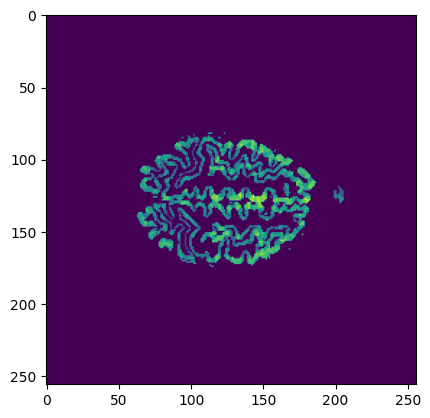

In [ ]:
# creating array for grey matter.
grey_scale = np.copy(grey_arr_int_3d_replica[:,:,:])
grey_x, grey_y, grey_z = np.where(grey_scale != 0)

# create array of size N*3 (N=no of elements, 3 is x,y,z axis), which have all the coordinates of grey matter.
grey_coordinate = []

for x in range(grey_x.size):
    arr = [grey_x[x], grey_y[x], grey_z[x]]
    grey_coordinate.append(arr)

grey_coordinate = np.array(grey_coordinate,ndmin=2)

# find min distance along with nearest point using KD distanceTree
distanceTree = spatial.KDTree(wm_coordinate)
minimumDist, minimumId = distanceTree.query(grey_coordinate)

# Replace the grey matter coordiante values with the smallest distance with white matter coordinate value
l = 0
for grey in grey_coordinate:
    grey = grey.tolist()
    grey_scale[grey[0],grey[1],grey[2]] = wm_boundary_final[wm_coordinate[minimumId[l]][0],wm_coordinate[minimumId[l]][1],wm_coordinate[minimumId[l]][2]]
    l+=1

# Create a copy to final grey matter to apply filters and remove the excess area
thicknessMapSubject2 = np.copy(grey_scale) # create copy
thicknessMapSubject2[thicknessMapSubject2 > 6] = 0 # apply tolerance
thicknessMapSubject2 = filters.gaussian(thicknessMapSubject2, sigma=0.3) # apply filter

# Print final result
plt.imshow(thicknessMapSubject2[:,80,:])

# **Version 2**

### **Introduction**
> The human cerebral cortex is comprised of a greatly folded sheet of neurons. The thickness of this sheet varies and is called the cortical thickness. There exist many algorithms and programs that analyze cortical thickness as it is an important area of the brain to study for signs of diseases. The goal of this project is to develop something similar in order to estimate the cortical thickness map of a T1-weighted image, which is a type of brain scan. To do this, we must determine the distance between the gray/white matter surface and the pial surface. The gray/white matter surface is where the gray matter meets the white matter and the pial surface is the out boundary of the brain’s gray matter.

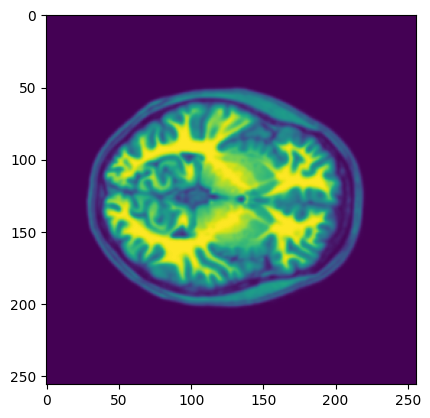

In [ ]:
sub1f = filters.gaussian(t1_s1,sigma=1)
plt.imshow(sub1f[:,128,:])

### **Segmentation of white matter**
> In order to get the distances needed between the gray/white matter surface and the pial surface, we must first isolate those surfaces. We start with the white/gray matter surface by segmenting the white matter from the rest of the image.
The white matter voxels in the image are naturally of a higher value than the rest of the brain, thus we use a simple threshold to isolate only voxels with high values. We then use a binary dilation morphological operation to expand the isolated white matter voxels. This creates an outer border that we then isolate by subtracting the original white matter segmentation. This provides us with our white/gray matter boundary, as the white matter border is naturally also the border between white and gray matter.

In [ ]:
wh = sub1f > 70
dwh = morphology.binary_dilation(wh)
ewh = dwh.astype(float) - wh

### **Segmentation of gray matter**
> We next need to segment the gray matter. This is done very similarly to the white matter. We use a threshold to find all voxels between two values that correspond to the gray matter. Once segmented, we make sure to assign the float type to the segmentation as our distance calculation will be done with float values. As before, we apply a binary dilation operation and subtract the initial gray matter segmentation from the dilated one. This results in the gray matter boundary. Since we need the pial surface and not the whole gray matter boundary, we must perform some more operations.

In [ ]:
gr = (sub1f < 70) & (sub1f > 45)
gr = gr.astype(float)
dgr = morphology.binary_dilation(gr)
egr = dgr.astype(float) - gr

### **Finding the pial surface**
> Now that we have both the white/gray matter surface and the gray matter boundary, we can isolate the pial surface. To do this we perform another binary dilation on the white/gray matter surface and then subtract that dilation from the gray matter boundary. The result is only the gray matter outer boundary. However, since we subtracted two already segmented images, some negative values pollute our result. To get rid of them, we simply isolate all values that are above 0. This results in a clean pial surface segmentation.

In [ ]:
dwh2 = morphology.binary_dilation(ewh)
dgr2 = egr.astype(float) - dwh2
fegr = dgr2 > 0
finalbound = ewh + fegr

### **Initializing coordinate arrays**
> In order to find the distance between the white/gray matter surface and the pial surface, we first need to initialize arrays of coordinates for the white/gray matter surface, the pial surface, and the full gray matter segmentation (which will be useful for the final step). To do this, we use the argwhere function in NumPy to generate arrays of non-zero coordinates for all three segmentations.

In [ ]:
no_zero_whb = np.argwhere(ewh == 1)
no_zero_grb = np.argwhere(fegr == 1)
no_zero_whb.shape
no_zero_grf = np.argwhere(gr == 1)
no_zero_grf.shape

(678494, 3)

### **Determining cortical distance**
> Now that we have both surfaces, we can calculate the cortical distance. To do this we use the Euclidean formula for distance calculation:
We create a function to calculate the Euclidean distance that takes in variables x and y and returns the distance value.

> We then use a for loop to iterate through all non-zero white/gray matter boundary voxels and find all distances to every pial surface voxel. We then find the minimum distance value from the list of white/gray voxel distances, which indicates the distance to the closest pial voxel. We then assign that distance value to the corresponding voxel on the original white/gray matter boundary segmentation.

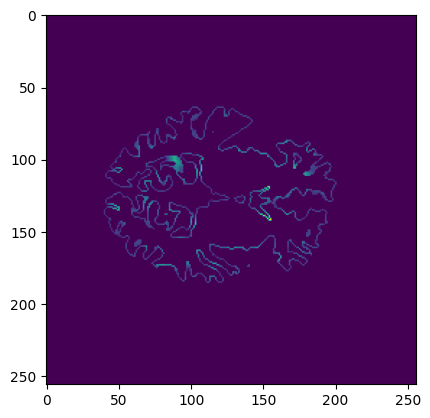

In [ ]:
def euclid(x,y):
    return np.sqrt(np.sum((x-y)**2, axis=1))

for x in range(no_zero_whb.shape[0]):
    d = euclid(no_zero_whb[x,:], no_zero_grb)
    mind = np.min(d)
    ewh[no_zero_whb[x,0],no_zero_whb[x,1],no_zero_whb[x,2]] = mind
plt.imshow(ewh[:,128,:])

### **Getting the cortical thickness map**
> Now that we have assigned the distance values to the white/gray voxels, we can use them to assign the distance to all other voxels in the gray matter segmentation and create the thickness map. To do this, we first define a function to find the closest white/gray voxel to each gray matter voxel. We used the KDTree data structure for this purpose.

> We then, as in the previous step, used a for loop to iterate through every gray matter voxel, find its closest white/gray matter border neighbor, and assign the value associated with the neighbor to the gray matter voxel. This created a cortical thickness map with each gray matter voxel having a distance value corresponding to its cortical thickness.

In [ ]:
def kdt(i,j):
    return spatial.KDTree(i).query(j)[1]

for x in range(no_zero_grf.shape[0]):
    pt = no_zero_grf[x,:]
    cl_dist = no_zero_whb[kdt(no_zero_whb,pt)]
    gr[pt[0],pt[1],pt[2]] = ewh[cl_dist[0],cl_dist[1],cl_dist[2]]
plt.imshow(gr[:,128,:])

KeyboardInterrupt: ignored